<a href="https://colab.research.google.com/github/naenumtou/dataScienceLab/blob/main/Theil_SenRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Set auto reload
%reload_ext autoreload
%autoreload 2

In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression, TheilSenRegressor

# Config 
%config InlineBackend.figure_format = 'retina' #Retina display
plt.style.use('seaborn-deep') #Plot style

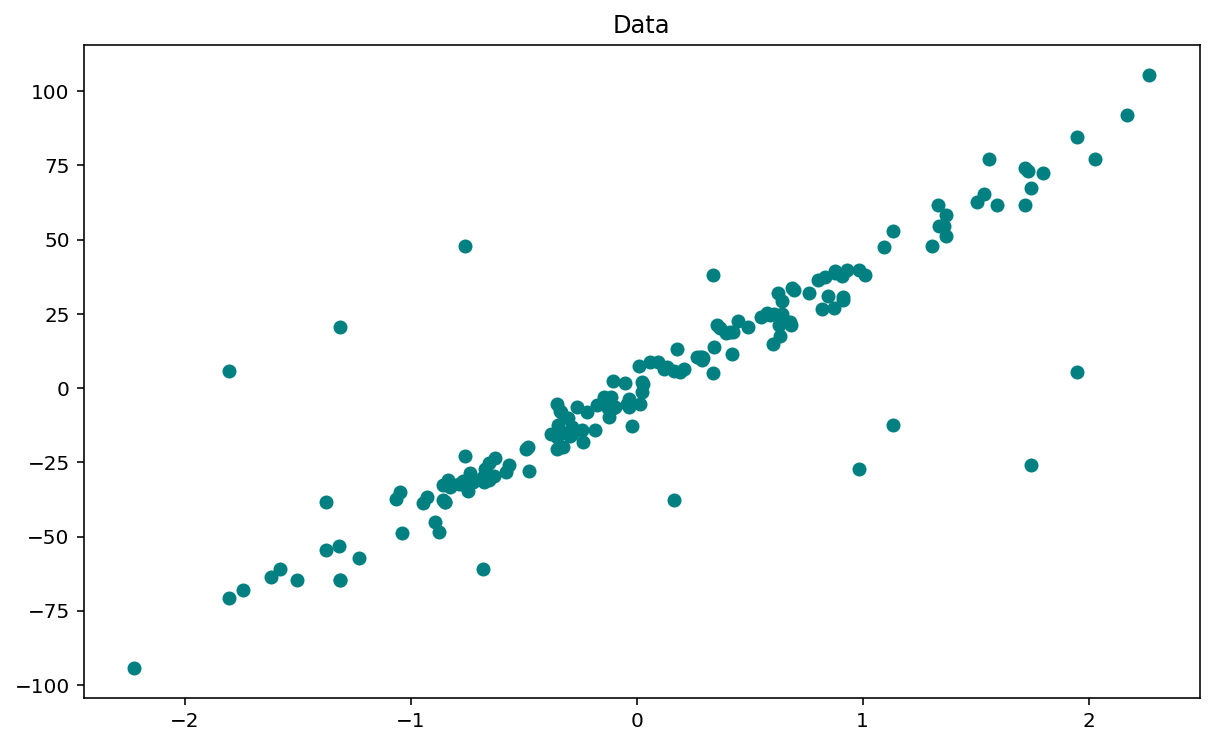

In [ ]:
# Create regression data
X, y = make_regression(
    n_samples = 150,
    n_features = 1,
    noise = 5
)

# Add outlier
for j in range(15):
    X = np.append(
        X, np.random.choice(X.flatten())
    )
    y = np.append(
        y, np.random.choice(y.flatten())
    )

X = X.reshape(-1,1)
y = y.reshape(-1,1)

# Plot
plt.figure(figsize = (10, 6))
plt.scatter(
    X,
    y,
    c = 'teal'
)
plt.title('Data')
plt.show()

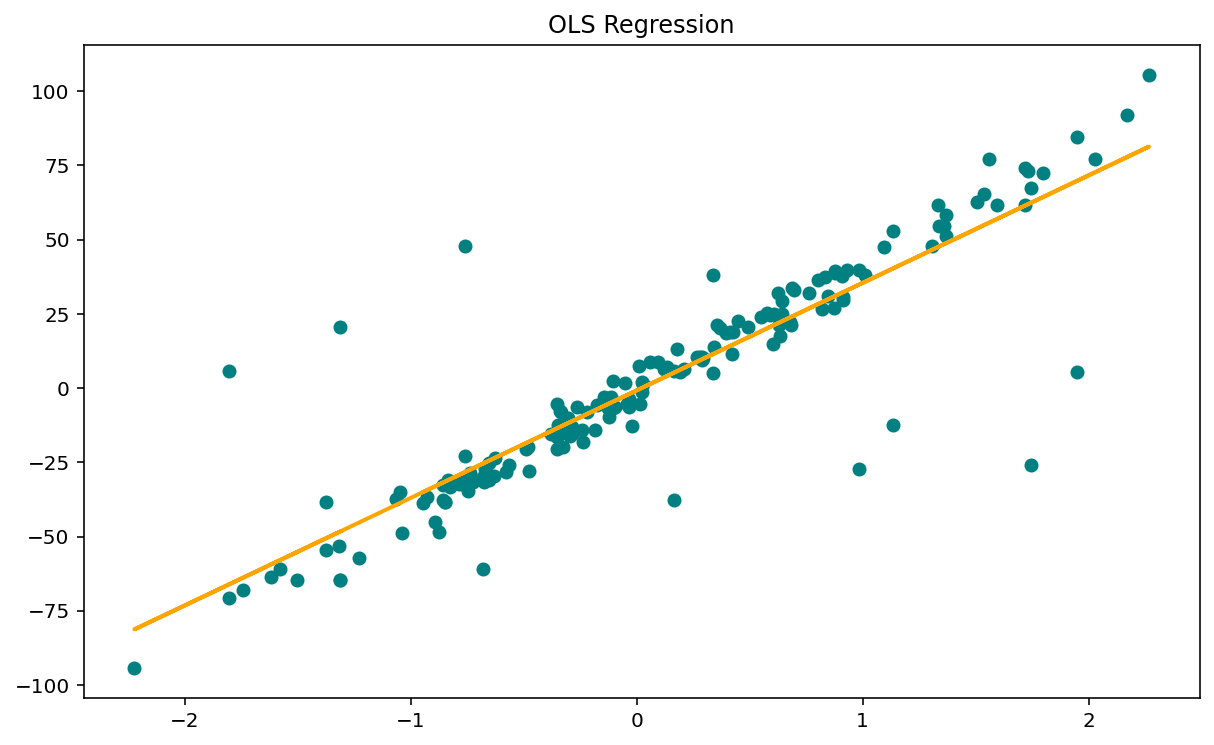

In [ ]:
# OLS
OLS = LinearRegression()
OLS.fit(X, y.ravel())

# Plot
plt.figure(figsize = (10, 6))
plt.scatter(
    X,
    y,
    c = 'teal'
)
plt.plot(
    X,
    OLS.predict(X),
    c = 'orange',
    linewidth = 2,
)
plt.title('OLS Regression')
plt.show()

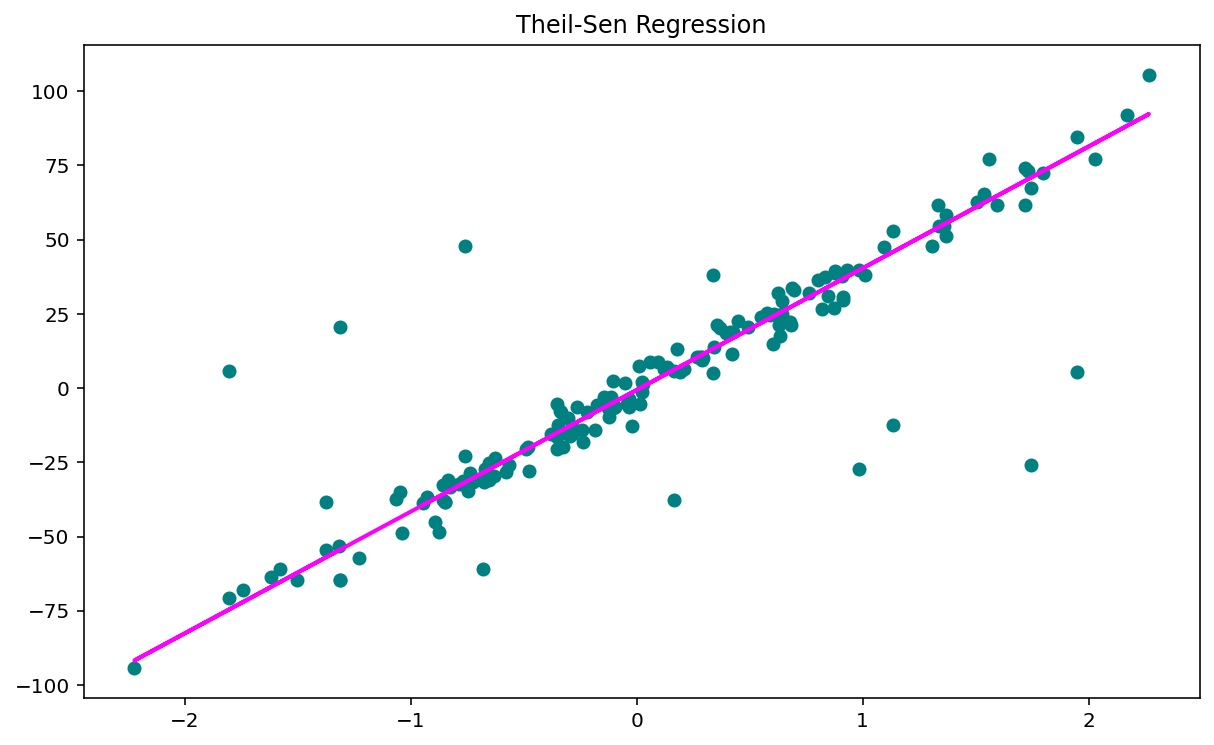

In [ ]:
# Theil-Sen
TS = TheilSenRegressor()
TS.fit(X, y.ravel())

# Plot
plt.figure(figsize = (10, 6))
plt.scatter(
    X,
    y,
    c = 'teal'
)
plt.plot(
    X,
    TS.predict(X),
    c = 'magenta',
    linewidth = 2,
)
plt.title('Theil-Sen Regression')
plt.show()

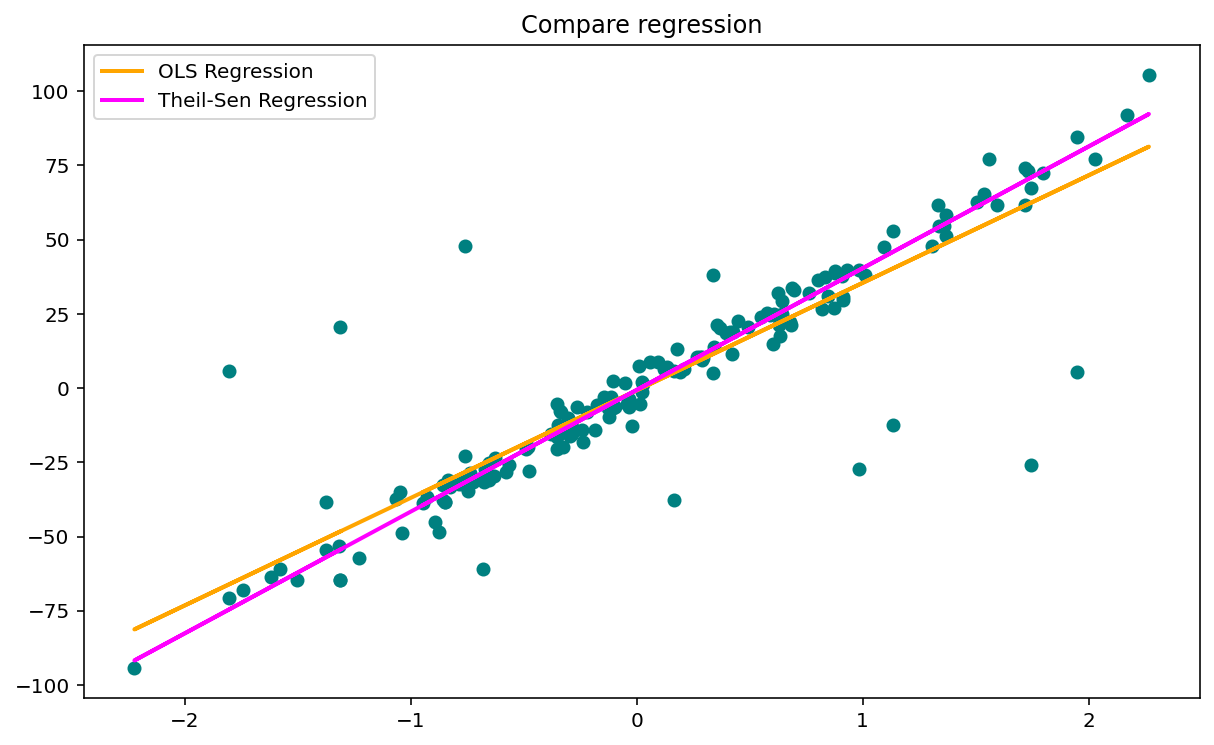

In [ ]:
# Compare
plt.figure(figsize = (10, 6))
plt.scatter(
    X,
    y,
    c = 'teal'
)
plt.plot(
    X,
    OLS.predict(X),
    c = 'orange',
    linewidth = 2,
    label = 'OLS Regression'
)
plt.plot(
    X,
    TS.predict(X),
    c = 'magenta',
    linewidth = 2,
    label = 'Theil-Sen Regression'
)
plt.title('Compare regression')
plt.legend(frameon = True, facecolor = 'white')
plt.show()

In [ ]:
# Export
pd.concat(
    [
        pd.DataFrame(X, columns = ['X1']),
        pd.DataFrame(y, columns = ['y'])
    ],
    axis = 1
).to_csv(
    'Theil-Sen_Data.csv',
    index = 0
)